<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch7_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전학습 모델의미 

In [ ]:
# 사전학습모델 : 기존에 자비어 등 임의의 값으로 초기화하던 모델의 가중치들을 다른 문제에 학습 시킨 가중치들로 초기화하는 방법
# 감정분석 문제를 학습한 모델의 가중치를 활용해 텍스트 유사도 모델의 가중치로 활용하는 방법
# 감정분석을 학습하면서 얻은 언어에 대한 이해를 학습한 후 그 정보를 유사도 문제를 학습하는데 활용하는 방식
# 하위문제(downstream task) : 사전학습한 가중치를 활용해 학습하고자 하는 본 문제
# pre-train task : 사전 학습한 모델
# 모델의 모든 가중치를 사용하는 것이 안니라 대부분의 가중치를 활용할 수 있지만 모델의 최종 출력값을 뽑는 가중치 층을 제외하고 사용해야한다. 최종 출력값의 경우 각 문제마다 형태가 모두 다름
# 요즘 대부분의 자연어 처리 연구에서 사전학습을 활용
# 언어모델을 사전학습의 핵심문제로 활용함
# 언어모델 : 특정단어가 주어졌을때 다음 단어가 어떤 단어인지를 예측하는 것을 해결하는 문제
# 이러한 과정을 거치면서 모델은 언어에 대한 전반적인 이해(NLU)를 하게됨 이렇게 사전학습된 지식을 기반으로 하위 문제에 대한 성능을 향상시킴
# 감정분석 등 어떤 문제든 사전학습 문제가 될 수 있다.
# 하지만 성능 및 데이터의 수 등 여러측면에서 언어모델을 사전학습의 문제로 선택하고 있음
# 라벨이 있는 데이터가 사전학습을 위해 존재해야하할뿐더러 실제 하위 문제와 다른 주제에 대한 학습을 하기 때문에 실제 지도 학습을 사전학습할 경우 하위 문제 모델의 성능을 오히려 떨어뜨리는 경우도 있음
# 언어모델의 경우, 라벨이 필요없는 대표적인 비지도 학습 문제 중 하나이기 때문에 데이터의 제약이 없고, 언어에 대한 전반적인 이해를 사전학습하는것이기에 하위문제의 성능도 대부분 향상시킨다
# 사전학습한 가중치를 활용해 하위문제를 학습하는 방법 :특징기반, 미세조정
# 1. 특징기반 : 사전학습된 특징을 하위 문제의 모델에 부가적인 특징으로 활용하는 방법. 단어에 대한 임베딩 벡터가 단어에 대한 특징이 된다. word2vec이 대표적
# 2. 미세조정 (Fine tunning) : 사전학습한 모든 가중치와 더불어 하위 문제를 위한 최소한의 가중치를 추가해서 모델을 추가로 학습하는 방법
# 트랜스포머 모델이후 미세조정 방법이 각광받고있음

# BERT - 감정분석

In [ ]:
# 18년 구글에서 공개한 논문에서 제안된 모델
# 비지도 사전학습을 한 모델에 추가로 하나의 완전연결 계층만 추가한 후 미세조정을 통해 총 11개의 자연어 처리 문제에서 최고의 성능
# 사전학습하는 모델이 양방향성을 띈다는 점
# 언어모델은 자연어 처리 분야에서 사전학습 문제로 활발히 사용됨, 언어모델을 예측하기 위한 데이터는 라벨이 필요없기 때문임.
# 텍스트 데이터 자체가 입력값이 되고 라벨 , 즉 정답이 되기 때문이다.
# 그래서 언어모델을 학습하는 것을 비지도 학습이라고 부른다.
# 버트는 2개의 문제를 사전학습 (MLM,NSP)
# 버트는 RELU함수 대신 GELU(정규분포의 누적분포함수)를 사용 -> 0주위에서 부드럽게 변화해 학습성능을 높인다.
# 버트 BASE(L:12) LARGE(L:24) , 파라미터수가 3배이상 차이가남
# 버트의 미세조정 태스크
# 언어적 용인가능성, 자연어 추론(수반,모순, 중립), 유사도예측, 감정분석, 개체명인식, 기계독해
# 버트를 개선하려고 노력한 모델(성능향상, 속도개선, 메모리 최적화):Spanbert, roberta, ernie)
# 버트 알고리즘 문제를 실험적으로 증명하며 개선하려는 모델 : XLNET
# 버트를 자연어 처리분야가 아닌 다른영역에서 활용하는 모델 : Videobert, visualbert


In [3]:
# 버트를 활용한 미세조정학습
#!pip install transformers==3.0.2
!pip install transformers==2.11.0

In [3]:
# 허깅 페이스 transformers라이브러리를 활용
# 사전학습된 상태에서 시작해야하는 주제의 연구를 다룰때 유용함
# 새로운 모델연구의 베이스라인 성능 측정을 할때 많이 활용됨

In [43]:
# 다국어 지원을 위한 버트모델을 활용할 예정
# bert의 다국어 (102개 언어)토크나이저를 한글에 적용해보려함
# 기본적으로 두가지 모듈을 불러와야함 하나는데이터를 전처리하는 토크나이저이고, 나머지 하나는 모델 가중치들을 가지고있는 모델
from transformers import *
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased' ,do_lower_case=False, cache_dir='/content/bert_pretrain') #

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

In [44]:
# bert 모델은 일반적으로 3가지 입력값을 받게됨(input_ids, attention_mask, token_type_ids)
# encode_plus : 버트 토크나이저 작업에 필요한 구조를 만들어줌, 특정문장을 버트에 필요한 입력형태로 변환하는것뿐만 아니라 문장을 최대길이에 맞게 패딩까지 해줌, 결괏값은 딕셔너리로 출력됨
# 참조: https://huggingface.co/transformers/main_classes/tokenizer.html?highlight=encode_plus#transformers.PreTrainedTokenizer.encode_plus
def bert_tokenizer(sent, MAX_LEN):
  encoded_dict = tokenizer.encode_plus(
      text = sent,
      add_special_tokens =True ,# add ' cls' and 'sep'
      max_length = MAX_LEN ,
      pad_to_max_length = True,
      return_attention_mask =True,
      truncation = True
  )

  input_id = encoded_dict['input_ids']
  attention_mask = encoded_dict['attention_mask']
  token_type_id = encoded_dict['token_type_ids']

  return input_id, attention_mask, token_type_id



# encode_plus의 변환순서는 다음과 같음
# 1. 문장을 토크나이징
# 2. add_special_tokens = true : 토큰의 시작점  cls, 마지막에 sep토큰 붙임
# 3. 각 토큰을 인덱스로 변환
# 4. max_length, pad_to_max_length
# 5. return_attention_mask기능을 통해 어텐션 마스크를 생성
# 6. 토큰타입은 문장이 1개일 경우0, 문장 2개일경우 0,1 로 구분함


In [7]:
# 버트를 활용한 한국어 텍스트 분류모델 (네이버 영화리뷰 데이터활용)
print(tokenizer.all_special_tokens, tokenizer.all_special_ids)

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]'] [0, 100, 101, 102, 103]


In [8]:
# test tokenizers
kor_encode= tokenizer.encode('안녕하세요 반갑습니다')
eng_encode= tokenizer.encode('Hello world')
kor_decode= tokenizer.decode(kor_encode)
eng_decode= tokenizer.decode(eng_encode)

In [9]:
print(kor_encode)
print(eng_encode)
print(kor_decode)
print(eng_decode)


[101, 9521, 118741, 35506, 24982, 48549, 9321, 118610, 119081, 48345, 102]
[101, 31178, 11356, 102]
[CLS] 안녕하세요 반갑습니다 [SEP]
[CLS] Hello world [SEP]


In [10]:
test_sentence = "안녕하세요, 반갑습니다."

encode = tokenizer.encode(test_sentence)
token_print = [tokenizer.decode(token) for token in encode]

print(encode)
print(token_print)

[101, 9521, 118741, 35506, 24982, 48549, 117, 9321, 118610, 119081, 48345, 119, 102]
['[ C L S ]', '안', '# # 녕', '# # 하', '# # 세', '# # 요', ',', '반', '# # 갑', '# # 습', '# # 니 다', '.', '[ S E P ]']


In [11]:
!git clone https://github.com/e9t/nsmc

fatal: destination path 'nsmc' already exists and is not an empty directory.


In [45]:
# 데이터 불러오기
# 데이터 전처리 준비
import os
import pandas as pd
import re
DATA_IN_PATH = '/content/nsmc/'
print("파일크기")
for  file in os.listdir(DATA_IN_PATH):
  if 'txt' in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH+ file)/ 1000000,2)) + 'MB')
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header=0, delimiter ='\t',quoting=3)
train_data.head()

파일크기
ratings_test.txt              4.89MB
ratings.txt                   19.52MB
ratings_train.txt             14.63MB


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [46]:
input_ids = []
attention_masks = []
token_type_ids = []
train_data_labels = []

def clean_text(sent):
  sent_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]"," ", sent)
  return sent_clean
  

In [47]:
MAX_LEN = 39 # EDA에서 추출된 Max Length
for train_sent, train_label in zip(train_data["document"], train_data["label"]):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer(clean_text(train_sent), MAX_LEN) # 

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
        train_data_labels.append(train_label)

    except Exception as e:
        print(e)
        print(train_sent)
        pass


expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan
expected string or bytes-like object
nan


In [48]:
import numpy as np
train_movie_input_ids = np.array(input_ids, dtype=int)  # input_ids 를 array로 바꿈
train_movie_attention_masks = np.array(attention_masks, dtype=int) # attention mask 를 array로 바꿈
train_movie_type_ids = np.array(token_type_ids, dtype=int) # token_type_ids를 array로 바꿈
train_movie_inputs = (train_movie_input_ids, train_movie_attention_masks, train_movie_type_ids)

train_data_labels = np.asarray(train_data_labels, dtype = np.int32) #레이블 토크나이징 리스트

print("# sents: {}, # labels: {}".format(len(train_movie_input_ids), len(train_data_labels)))

# sents: 149995, # labels: 149995


In [49]:
train_movie_input_ids

array([[  101,  9519,  9074, ...,     0,     0,     0],
       [  101,   100,  9928, ...,     0,     0,     0],
       [  101,   100,   102, ...,     0,     0,     0],
       ...,
       [  101,  9638, 14153, ...,     0,     0,     0],
       [  101,  9751, 97707, ...,     0,     0,     0],
       [  101, 48556, 42428, ...,     0,     0,     0]])

In [50]:
train_movie_attention_masks

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [51]:
train_movie_type_ids

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
train_movie_inputs

(array([[  101,  9519,  9074, ...,     0,     0,     0],
        [  101,   100,  9928, ...,     0,     0,     0],
        [  101,   100,   102, ...,     0,     0,     0],
        ...,
        [  101,  9638, 14153, ...,     0,     0,     0],
        [  101,  9751, 97707, ...,     0,     0,     0],
        [  101, 48556, 42428, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [53]:
train_data_labels

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [54]:
# 토큰길이 분포의 3사분위갑인 39를 최대길이로 설정

In [55]:
#MAX_LENGTH 39
input_id = train_movie_input_ids[1]
attention_mask = train_movie_attention_masks[1] 
token_type_id = train_movie_type_ids[1]

print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[   101    100   9928  58823  30005  11664   9757 118823  30858  18227
 119219   9580  41605  25486  12310  20626  23466   8843 118986  12508
   9523  17196  16439    102      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[CLS] [UNK] 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [33]:
# 네이버 영화리뷰 모델 학습
import tensorflow as tf

# 사전학습된 버트 모델을 불러와 그 위에 완전 연결층 1층을 쌓는 구조
# __init__에서 선언한 내용을 실제 입력을 받고, 실행하는 call


class TFBertClassifier(tf.keras.Model):
  def __init__(self, model_name, dir_path, num_class):
    super(TFBertClassifier, self).__init__()

    self.bert = TFBertModel.from_pretrained(model_name, cache_dir=  dir_path)  # 기존에 학습된 내용이 로드됨
    self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
    self.classifier = tf.keras.layers.Dense(num_class, kernel_initializer= tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), name='classifier')

  def call(self, inputs, attention_mask=None, token_type_ids= None, training= False):
    outputs = self.bert(inputs, attention_mask = attention_mask, token_type_ids= token_type_ids)
    pooled_output = outputs[1]
    pooled_output = self.dropout(pooled_output, training= training)
    logits = self.classifier(pooled_output)

    return logits



In [64]:
cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased',
                                  dir_path='/content/bert_pretrain/',
                                  num_class=2)  # 감정분석이기에 긍정부정 num_class는 2
# 다운로드가 되어야함
# cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased', dir_path='bert_ckpt', num_class=2)  


Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

In [65]:
# 학습 준비하기
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [66]:
# cpu아닌 gpu를 사용예정
from tensorflow.python.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
model_name = "tf2_bert_naver_movie"
DATA_IN_PATH = 'data_in/KOR'
DATA_OUT_PATH = "data_out/KOR"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)


data_out/KOR/tf2_bert_naver_movie -- Folder already exists 



In [67]:
#random seed 고정
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE = 128  # 32
NUM_EPOCHS = 3
VALID_SPLIT = 0.1 # 0.2
MAX_LEN = 39 # EDA에서 추출된 Max Length
DATA_IN_PATH = 'data_in/KOR'
DATA_OUT_PATH = "data_out/KOR"



In [68]:
# 학습과 eval 시작
history = cls_model.fit(train_movie_inputs, train_data_labels, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_split = VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])


Epoch 1/3
1055/1055 [==============================] - ETA: 0s - loss: 0.4215 - accuracy: 0.7985
Epoch 00001: val_accuracy improved from -inf to 0.83747, saving model to data_out/KOR/tf2_bert_naver_movie/weights.h5
1055/1055 [==============================] - 654s 602ms/step - loss: 0.4215 - accuracy: 0.7985 - val_loss: 0.3503 - val_accuracy: 0.8375
Epoch 2/3
1055/1055 [==============================] - ETA: 0s - loss: 0.3295 - accuracy: 0.8522
Epoch 00002: val_accuracy improved from 0.83747 to 0.85080, saving model to data_out/KOR/tf2_bert_naver_movie/weights.h5
1055/1055 [==============================] - 632s 599ms/step - loss: 0.3295 - accuracy: 0.8522 - val_loss: 0.3636 - val_accuracy: 0.8508
Epoch 3/3
1055/1055 [==============================] - ETA: 0s - loss: 0.2800 - accuracy: 0.8785
Epoch 00003: val_accuracy improved from 0.85080 to 0.85367, saving model to data_out/KOR/tf2_bert_naver_movie/weights.h5
1055/1055 [==============================] - 631s 598ms/step - loss: 0.2800

In [71]:
# 시각화
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

#steps_for_epoch
print(history.history)


{'loss': [0.4214678406715393, 0.32948610186576843, 0.2799730598926544], 'accuracy': [0.7984666228294373, 0.8522389531135559, 0.8785436749458313], 'val_loss': [0.3503328561782837, 0.363631010055542, 0.3674323260784149], 'val_accuracy': [0.8374666571617126, 0.8507999777793884, 0.8536666631698608]}


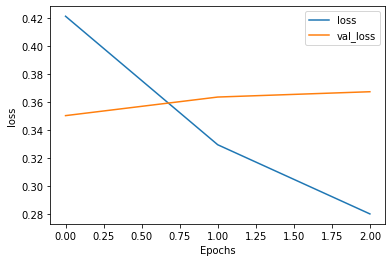

In [72]:
plot_graphs(history,'loss')

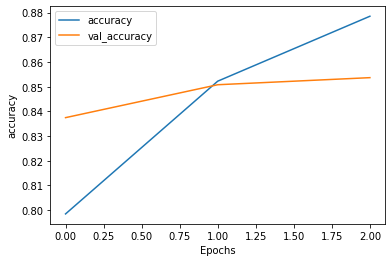

In [73]:
plot_graphs(history,'accuracy')

In [79]:
# TEST데이터 불러오기
DATA_TEST_PATH = '/content/nsmc/'

test_data = pd.read_csv(DATA_TEST_PATH + 'ratings_test.txt', header = 0, delimiter = '\t', quoting=3)
test_data = test_data.dropna() # 결측치인행 없애기
test_data.head()


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [83]:
#네이버 영화리뷰 모델 테스트

input_ids = []
attention_masks = []
token_type_ids =[]
test_data_labels = []
for test_sent , test_label in zip(test_data['document'], test_data['label']):
  try:
    input_id, attention_mask, token_type_id = bert_tokenizer(clean_text(test_sent), MAX_LEN)
    input_ids.append(input_id)
    attention_masks.append(attention_mask)
    token_type_ids.append(token_type_id)
    test_data_labels.append(test_label)

  except  Exception as e:
    print(e)
    print(test_sent)
    pass

In [93]:
test_movie_input_ids = np.array(input_ids, dtype=int)
test_movie_attention_masks = np.array(attention_masks, dtype=int)
test_movie_type_ids = np.array(token_type_ids, dtype=int)
test_movie_inputs = (test_movie_input_ids, test_movie_attention_masks, test_movie_type_ids)
test_data_labels = np.asarray(test_data_labels, dtype= np.int32)
print("num sents: {}, labels: {}".format(len(test_movie_input_ids), len(test_data_labels)))


num sents: 49997, labels: 49997


In [94]:
test_movie_input_ids

array([[  101,  8911,   100, ...,     0,     0,     0],
       [  101,   102,     0, ...,     0,     0,     0],
       [  101,  9303, 21711, ...,     0,     0,     0],
       ...,
       [  101,  8924, 67527, ...,     0,     0,     0],
       [  101,  9666, 14423, ...,     0,     0,     0],
       [  101,  9246, 32537, ...,     0,     0,     0]])

In [95]:
test_data_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [97]:
results = cls_model.evaluate(test_movie_inputs, test_data_labels, batch_size=512) # 85% 결과나옴
print(results)
#4장에서 cnn을 활용했을때  82%, bert사용시 85%
# 트랜스포머의 인코더 부분인 버트를 사용
# 많은 데이터를 사전학슴해서 모델이 언어에 대한 정보를 학습하게 되고, 그 지식을 기반으로 다양한 문제에서 기존보다 높은 점수를 냄


98/98 [==============================] - 64s 655ms/step - loss: 0.3824 - accuracy: 0.8501
[0.3823665380477905, 0.8501310348510742]


# BERT - NLI (자연어 추론문제) 

In [98]:
# 버트를 활용한 한국어 자연어 추론모델
# 2개의 문장을 입력으로 하는 자연어 추론문제
# 카카오에서 제공한 kornli데이터를 활용해 전처리를 수행하고 모델을 구성
# KorNLI 데이터셋 다운로드받기
!git clone https://github.com/kakaobrain/KorNLUDatasets
# 깃허브 저장소에서 다운로드받기
# kornluatasets아래의 kornli아래의 multinli.train.ko.tsv, snli_1.0_train.kor.tsv파일을 사용

Cloning into 'KorNLUDatasets'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 16 (delta 1), reused 16 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), done.
Checking out files: 100% (9/9), done.


In [104]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
DATA_IN_PATH = '/content/KorNLUDatasets/'
TRAIN_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'multinli.train.ko.tsv')
multinli_data = pd.read_csv(TRAIN_XNLI_DF, sep='\t', error_bad_lines=False)
multinli_data.head(10)
# tsv파일 : 탭으로 각 항목이 분리돼 있음
# 에러를 건너 뛰는걸 확인가능, 3개행이 ㅜㄴ제임
# 정답은 수반, 모순, 중립 세가지이다



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 24426: expected 3 fields, saw 4\nSkipping line 156343: expected 3 fields, saw 4\nSkipping line 218766: expected 3 fields, saw 4\nSkipping line 232318: expected 3 fields, saw 4\nSkipping line 253493: expected 3 fields, saw 4\n'
b'Skipping line 265734: expected 3 fields, saw 4\nSkipping line 282588: expected 3 fields, saw 4\nSkipping line 350969: expected 3 fields, saw 4\n'


,sentence1,sentence2,gold_label
0,개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.,제품과 지리학은 크림 스키밍을 작동시키는 것이다.,neutral
1,시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...,사람들이 기억하면 다음 수준으로 물건을 잃는다.,entailment
2,우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.,우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.,entailment
3,어떻게 아세요? 이 모든 것이 다시 그들의 정보다.,이 정보는 그들의 것이다.,entailment
4,"그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...",테니스화의 가격은 다양하다.,neutral
5,내 워커가 고장나서 지금 화가 났어. 스테레오를 정말 크게 틀어야 해.,나는 내 워크맨이 고장나서 화가 나서 이제 스테레오를 정말 크게 틀어야 한다.,entailment
6,그러나 apse 위에서 살아남은 기독교 모자이크 몇 개는 아기 예수와 함께 성모인데...,기독교 모자이크의 대부분은 이슬람교도들에 의해 파괴되었다.,neutral
7,(슬레이트에 대한 읽기는 잭슨의 연구 결과를 받아들인다.),슬레이트는 잭슨의 발견에 대해 의견을 가지고 있었다.,entailment
8,게이들과 레즈비언들.,이성애자.,contradiction
9,Rue des Francs-Bourgeois의 끝에는 많은 사람들이 돌과 붉은 벽돌...,Place des Vosges는 전적으로 회색 대리석으로 만들어졌다.,contradiction


In [106]:
TRAIN_SNLI_DF =os.path.join(DATA_IN_PATH, 'KorNLI', 'snli_1.0_train.ko.tsv')  # /content/KorNLUDatasets/KorNLI/snli_1.0_train.ko.tsv
snli_data = pd.read_csv(TRAIN_SNLI_DF, sep='\t', error_bad_lines=False)
snli_data.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,sentence1,sentence2,gold_label
0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral
1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction
2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment
3,카메라에 웃고 손을 흔드는 아이들,그들은 부모님을 보고 웃고 있다,neutral
4,카메라에 웃고 손을 흔드는 아이들,아이들이 있다,entailment
5,카메라에 웃고 손을 흔드는 아이들,아이들이 얼굴을 찌푸리고 있다,contradiction
6,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년은 인도를 따라 스케이트를 탄다.,contradiction
7,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,그 소년은 스케이트보드를 타는 묘기를 부린다.,entailment
8,한 소년이 빨간 다리 한가운데 스케이트보드에 뛰어오르고 있다.,소년이 안전 장비를 착용하고 있다.,neutral
9,나이 든 남자가 커피숍의 작은 테이블에 오렌지 주스를 들고 앉아 있고 밝은 색 셔츠...,나이 든 남자가 딸이 퇴근하기를 기다리면서 주스를 마신다.,neutral


In [107]:
train_data = pd.concat([multinli_data, snli_data], axis= 0 ) # 0:행으로 합치기

In [108]:
print('전체 multinli_data개수 :{}'.format(len(multinli_data)))  # 38만개
print('전체 snli data개수 :{}'.format(len(snli_data)))  # 55만개
print('전체 train data개수 : {}'.format(len(train_data))) # 93만개


전체 multinli_data개수 :385494
전체 snli data개수 :550152
전체 train data개수 : 935646


In [111]:
train_set = pd.Series(train_data['sentence1'].tolist() + train_data['sentence2'].tolist()).astype(str)
train_set.head()



0           개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1    시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                    우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                         어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4    그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
dtype: object

In [112]:
#전체 문장의 개수가 두배가 됨
print('전체 문장데이터의 개수:{}'.format(len(train_set))) # 180만 
print('유일한 문장수:{}'.format(len(np.unique(train_set)))) # 110만
print('반복해서 나오는 문장의수 : {}'.format(np.sum(train_set.value_counts() > 1))) # 30만

전체 문장데이터의 개수:1871292
유일한 문장수:1105355
반복해서 나오는 문장의수 : 308368


Text(0, 0.5, '# of sentences')

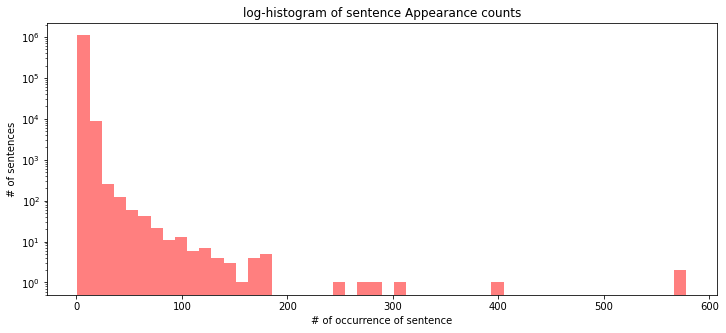

In [113]:
# 그래프로 표현하기
plt.figure(figsize=(12,5))
plt.hist(train_set.value_counts(), bins= 50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy= 'clip')
plt.title('log-histogram of sentence Appearance counts')
plt.xlabel('# of occurrence of sentence')
plt.ylabel('# of sentences')
# 중복횟수가 1인 질문들 유일한 질문이 가장많고, 가장 많이중복된 횟수는 500번이 넘는 질문도 있다. 두개의 데이터를 붙이고, 100만개의 데이터가 들어가다 보니 이상치 값이 다수존재

In [115]:
print('중복 최대개수', np.max(train_set.value_counts()))
print('중복 최소개수', np.min(train_set.value_counts()))
print('중복 평균개수', np.mean(train_set.value_counts()))
print('중복 중간길이', np.median(train_set.value_counts()))


중복 최대개수 578
중복 최소개수 1
중복 평균개수 1.6929330396117084
중복 중간길이 1.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f3d4db18510>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d4db0fa10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d4db60b90>],
 'means': [<matplotlib.lines.Line2D at 0x7f3d4db02650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d4db02f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d4db0f290>,
  <matplotlib.lines.Line2D at 0x7f3d4db0f410>]}

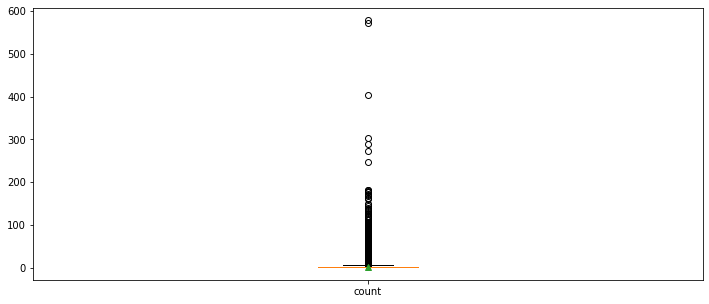

In [116]:
plt.figure(figsize= (12,5))
plt.boxplot([train_set.value_counts()], labels = ['count'], showmeans= True)

In [120]:
tokenizer =  BertTokenizer.from_pretrained('bert-base-multilingual-cased' , do_lower_case=False , cache_dir = '/content/bert_pretrain')


In [121]:
train_bert_token_counts = train_set.apply(lambda x:len(tokenizer.tokenize(x)))
# 버트 토크나이저를 호출
# 각 문장을 버트 토크나이저를 통해 하위 토큰으로 분류한 개수값을 train_bert_token_counts값에 넣음

Text(0, 0.5, 'prob')

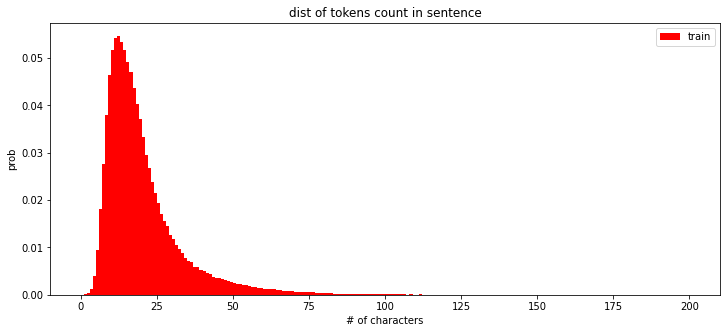

In [122]:
plt.figure(figsize=(12,5))
plt.hist(train_bert_token_counts, bins=200, range=[0,200], facecolor='r', density = True, label='train')
plt.title('dist of tokens count in sentence')
plt.legend()
plt.xlabel('# of characters')
plt.ylabel('prob')

In [123]:
print('문장 tokens 개수 최대값: {}'.format(np.max(train_bert_token_counts)))
print('문장 tokens 개수 최소: {}'.format(np.min(train_bert_token_counts)))
print('문장 tokens 개수 평균값: {}'.format(np.mean(train_bert_token_counts)))
# 평균적으로 26글자가 있다는것을 알수있음, 최대값은 9006

문장 tokens 개수 최대값: 9006
문장 tokens 개수 최소: 1
문장 tokens 개수 평균값: 20.24058030494439


(-0.5, 799.5, 599.5, -0.5)

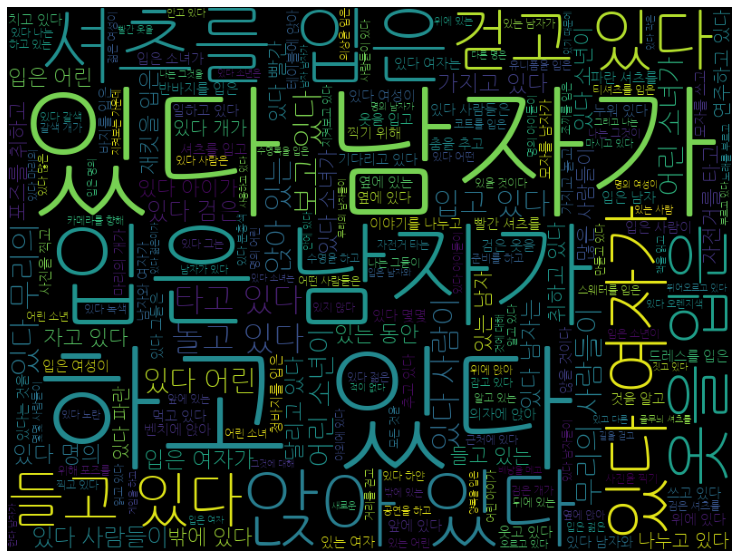

In [127]:
# 워드클라우드로 시각화 하기
from wordcloud import WordCloud
font_path = os.path.join('/content', 'NanumGothicLight.ttf')
cloud = WordCloud(font_path = font_path, width =800, height= 600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


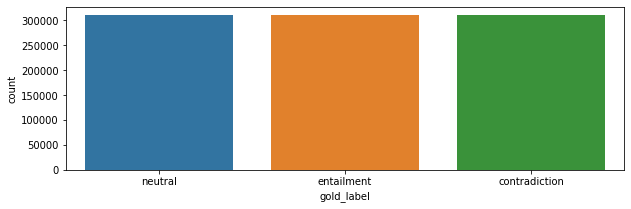

In [130]:
fig, axe= plt.subplots(ncols=1)
fig.set_size_inches(10,3)  # 이미지 나오는 크기 설정
sns.countplot(train_data['gold_label'])
# 3개모두 비슷한 비율을 가지고 있음을 알 수 있다.

In [139]:
# KONLI 데이터 전처리
tf.random.set_seed(1234)
np.random.seed(1234)

BATCH_SIZE= 128
NUM_EPOCHS= 3
MAX_LEN =24*2
DATA_IN_PATH = '/content/KorNLUDatasets'
DATA_OUT_PATH = '/content/data_out'



In [140]:
# 학습데이터 불러오기
TRAIN_SNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'snli_1.0_train.ko.tsv')
TRAIN_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'multinli.train.ko.tsv')
DEV_XNLI_DF = os.path.join(DATA_IN_PATH, 'KorNLI', 'xnli.dev.ko.tsv')

train_data_snli = pd.read_csv(TRAIN_SNLI_DF, header = 0 , delimiter = '\t', quoting= 3)
train_data_xnli = pd.read_csv(TRAIN_XNLI_DF, header = 0 , delimiter = '\t', quoting= 3)
dev_data_xnli = pd.read_csv(DEV_XNLI_DF, header = 0 , delimiter = '\t', quoting= 3)

In [141]:
train_data_snli_xnli = train_data_snli.append(train_data_xnli)
train_data_snli_xnli = train_data_snli_xnli.dropna()
train_data_snli_xnli = train_data_snli_xnli.reset_index()
dev_data_xnli = dev_data_xnli.dropna()

In [144]:
print('total dataset : train-{}, dev-{}'.format(len(train_data_snli_xnli), len(dev_data_xnli)))

total dataset : train-942808, dev-2490


In [167]:
# bert tokenizer v2
def bert_tokenizer_v2(sent1, sent2, MAX_LEN):
  # for 2 sentences input

  encoded_dict = tokenizer.encode_plus(text= sent1,
                                       text_pair= sent2,
                                       add_special_tokens= True,
                                       max_length = MAX_LEN,
                                       return_attention_mask = True,
                                       pad_to_max_length = True,
                                       truncation=True)
  input_id = encoded_dict['input_ids']
  attention_mask = encoded_dict['attention_mask']
  token_type_id = encoded_dict['token_type_ids']
  return input_id, attention_mask, token_type_id




In [168]:
train_data_xnli['sentence1']

0                개념적으로 크림 스키밍은 제품과 지리라는 두 가지 기본 차원을 가지고 있다.
1         시즌 중에 알고 있는 거 알아? 네 레벨에서 다음 레벨로 잃어버리는 거야 브레이브스...
2                         우리 번호 중 하나가 당신의 지시를 세밀하게 수행할 것이다.
3                              어떻게 아세요? 이 모든 것이 다시 그들의 정보다.
4         그래, 만약 네가 테니스화 몇 개를 사러 간다면, 나는 왜 그들이 100달러대에서 ...
                                ...                        
392697                    분명히, 캘리포니아는 더 잘 할 수 있고, 더 잘해야 한다.
392698    한때 유럽에서 가장 아름다운 거리로 여겨졌는데, 이는 원래의 많은 건물들이 교체되었...
392699                    하우스보트는 영국 라지의 전성기의 아름답게 보존된 전통이다.
392700    사망 기사는 그의 평론가의 신디케이트 TV 쇼에서 동료 검토 자 Roger Eber...
392701    내가 해야 한다는 걸 알거나, 아니면 누가 하라고 하는 것보다 그녀를 밀고하는 것에...
Name: sentence1, Length: 392702, dtype: object

In [169]:
train_data_xnli['sentence2']

0                         제품과 지리학은 크림 스키밍을 작동시키는 것이다.
1                          사람들이 기억하면 다음 수준으로 물건을 잃는다.
2                우리 팀의 일원이 당신의 명령을 엄청나게 정확하게 실행할 것이다.
3                                      이 정보는 그들의 것이다.
4                                     테니스화의 가격은 다양하다.
                             ...                     
392697                              캘리포니아는 더 잘할 수 없다.
392698                   그래서 원래의 많은 건물들이 편의점으로 대체되었다.
392699           하우스보트의 전통은 영국 라지가 여전히 강해지는 동안 시작되었다.
392700          부고문은 아름다웠고 연예계에서의 그의 업적에 대해 현물로 쓰여졌다.
392701    남편이 요즘 너무 과로해서 이 근처에서 많은 일을 부탁할 용기가 나지 않는다.
Name: sentence2, Length: 392702, dtype: object

In [192]:
#  dev데이터셋 먼저 변환
input_ids = []
attention_masks = []
token_type_ids = []

for sent1, sent2 in zip(dev_data_xnli['sentence1'], dev_data_xnli['sentence2']):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    
dev_xnli_input_ids = np.array(input_ids, dtype=int)
dev_xnli_attention_masks = np.array(attention_masks, dtype=int)
dev_xnli_type_ids = np.array(token_type_ids, dtype=int)
dev_xnli_inputs = (dev_xnli_input_ids, dev_xnli_attention_masks, dev_xnli_type_ids)

In [170]:
input_ids = []
attention_masks = []
token_type_ids = []

for sent1, sent2 in zip(train_data_snli_xnli['sentence1'], train_data_snli_xnli['sentence2']):
    try:
        input_id, attention_mask, token_type_id = bert_tokenizer_v2(sent1, sent2, MAX_LEN)

        input_ids.append(input_id)
        attention_masks.append(attention_mask)
        token_type_ids.append(token_type_id)
    except Exception as e:
        print(e)
        print(sent1, sent2)
        pass
    

In [172]:
train_snli_xnli_input_ids = np.array(input_ids, dtype=int)
train_snli_xnli_attention_masks = np.array(attention_masks, dtype=int)
train_snli_xnli_type_ids = np.array(token_type_ids, dtype=int)
train_snli_xnli_inputs = (train_snli_xnli_input_ids, train_snli_xnli_attention_masks, train_snli_xnli_type_ids)

In [174]:
input_id = train_snli_xnli_input_ids[2]
attention_mask = train_snli_xnli_attention_masks[2]
token_type_id =  train_snli_xnli_type_ids[2]
print(input_id)
print(attention_mask)
print(token_type_id)
print(tokenizer.decode(input_id))

[  101  9251 10622  9847 97802  8888 13890 33305  9379 25549 12310  9619
 11261  9150 12965 28188 66346   119   102  9405 61250 10892  9538 78705
 11489  9251 10622  9845 11664 11506   119   102     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[CLS] 말을 탄 사람이 고장난 비행기 위로 뛰어오른다. [SEP] 사람은 야외에서 말을 타고 있다. [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [178]:
# label 숫자로 변환
label_dict= {"entailment" :0, "contradiction": 1, "neutral": 2}
def convert_int(label):
  num_label = label_dict[label]
  return num_label 


train_data_snli_xnli["gold_label_int"] = train_data_snli_xnli["gold_label"].apply(convert_int)
train_data_labels = np.array(train_data_snli_xnli['gold_label_int'], dtype=int)

dev_data_xnli["gold_label_int"] = dev_data_xnli["gold_label"].apply(convert_int)
dev_data_labels = np.array(dev_data_xnli['gold_label_int'], dtype=int)

print("# train labels: {}, #dev labels: {}".format(len(train_data_labels), len(dev_data_labels)))


# train labels: 942808, #dev labels: 2490


In [182]:
train_data_snli_xnli.head(3)

,index,sentence1,sentence2,gold_label,gold_label_int
0,0,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 경쟁을 위해 말을 훈련시키고 있다.,neutral,2
1,1,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,한 사람이 식당에서 오믈렛을 주문하고 있다.,contradiction,1
2,2,말을 탄 사람이 고장난 비행기 위로 뛰어오른다.,사람은 야외에서 말을 타고 있다.,entailment,0


In [181]:
dev_data_xnli.head(3)


,sentence1,sentence2,gold_label,gold_label_int
0,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 학교 버스가 그를 내려주자마자 엄마에게 전화를 걸었다.,neutral,2
1,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 한마디도 하지 않았다.,contradiction,1
2,"그리고 그가 말했다, ""엄마, 저 왔어요.""",그는 엄마에게 집에 갔다고 말했다.,entailment,0


In [199]:
class TFBertClassifier(tf.keras.Model):
  def __init__(self, model_name, dir_path, num_class):
    super(TFBertClassifier, self).__init__()
    self.bert = TFBertModel.from_pretrained(model_name, cache_dir = dir_path) 
    self.dropout = tf.keras.layers.Dropout(self.bert.config.hidden_dropout_prob)
    self.classifier =tf.keras.layers.Dense(num_class, kernel_initializer= tf.keras.initializers.TruncatedNormal(self.bert.config.initializer_range), name="classifier")

  def call(self, inputs, attention_mask =None, token_type_ids=None, training=False):
    outputs = self.bert(inputs, attention_mask= attention_mask, token_type_ids = token_type_ids)
    pooled_output = outputs[1]
    pooled_output = self.dropout(pooled_output, training= training )
    logits = self.classifier(pooled_output)
    return logits



In [200]:
cls_model = TFBertClassifier(model_name='bert-base-multilingual-cased', dir_path ='/content/bert_pretrain/', num_class=3)
optimizer = tf.keras.optimizers.Adam(3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
cls_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [201]:
# 학습
model_name = "tf2_KorNLI"

# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)
checkpoint_path = os.path.join(DATA_OUT_PATH, model_name, 'weights.h5')
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)


/content/data_out/tf2_KorNLI -- Folder already exists 



In [ ]:
# 학습과 eval 시작

BATCH_SIZE = 32
NUM_EPOCHS = 3
MAX_LEN = 24 * 2 # Average total * 2

history = cls_model.fit(train_snli_xnli_inputs, train_data_labels, epochs=NUM_EPOCHS,
            validation_data = (dev_xnli_inputs, dev_data_labels),
            batch_size=BATCH_SIZE, callbacks=[earlystop_callback, cp_callback])

#steps_for_epoch
print(history.history)


Epoch 1/3
  657/29463 [..............................] - ETA: 1:44:11 - loss: 0.9110 - accuracy: 0.5661